In [118]:
import os
import numpy as np
from typing import Union, List, Dict
import pandas as pd
import polars as pl
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.express as px

# check DILI plates

In [119]:
base_path = "OASIS_DILI_ECP/output/"

file_names = [
    "OASIS_DILI_ECP_source_Batch1.csv",
    "OASIS_DILI_ECP_source_Batch2.csv",
    "OASIS_DILI_ECP_source_Batch3.csv",
    "OASIS_DILI_ECP_source_Batch4.csv",
]

full_paths = [base_path + file_name for file_name in file_names]
dfs = [pd.read_csv(file_path).assign(Source_File=file_name) for file_path, file_name in zip(full_paths, file_names)]
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.head(20)

,Source Well,Dest Well,Volume,Compound,Source_File
0,A01,F16,150,JUMP1_rep1,OASIS_DILI_ECP_source_Batch1.csv
1,A02,A10,150,DMSO,OASIS_DILI_ECP_source_Batch1.csv
2,A03,C11,150,Cpd1_dose1,OASIS_DILI_ECP_source_Batch1.csv
3,A04,P14,150,Cpd1_dose3,OASIS_DILI_ECP_source_Batch1.csv
4,A05,P12,150,Cpd2_dose1,OASIS_DILI_ECP_source_Batch1.csv
5,A06,O10,150,Cpd2_dose3,OASIS_DILI_ECP_source_Batch1.csv
6,A07,C04,150,Cpd3_dose1,OASIS_DILI_ECP_source_Batch1.csv
7,A08,B14,150,Cpd3_dose3,OASIS_DILI_ECP_source_Batch1.csv
8,A09,B09,150,Cpd4_dose1,OASIS_DILI_ECP_source_Batch1.csv
9,A10,D17,150,Cpd4_dose3,OASIS_DILI_ECP_source_Batch1.csv


In [120]:
import pandas as pd

summary_per_plate = []

for file_name in file_names:
    df_plate = combined_df[combined_df['Source_File'] == file_name]
    
    length_of_df = len(df_plate)
    no_replicates_in_dest_well = df_plate['Dest Well'].is_unique
    
    rows = [chr(i) for i in range(65, 81)]
    cols = [f"{i:02}" for i in range(1, 25)]
    expected_wells = {f"{row}{col}" for row in rows for col in cols}

    present_wells = {well.strip().upper() for well in df_plate['Dest Well']}
    dest_wells_in_384_plate = present_wells == expected_wells
    
    cmp_compounds = df_plate[df_plate['Compound'].str.startswith("Cpd", na=False)]
    unique_cmp_compounds = cmp_compounds['Compound'].nunique()
    
    cmp_compounds['Compound Name'] = cmp_compounds['Compound'].str.extract(r'^(Cpd\d+)_')[0]
    cmp_compounds['Dose'] = cmp_compounds['Compound'].str.extract(r'_dose(\d+)$')[0]
    
    unique_cmp_counts = cmp_compounds['Compound Name'].nunique()
    total_dose_count = cmp_compounds['Dose'].nunique()
    
    jump_compounds = df_plate[df_plate['Compound'].str.startswith("JUMP", na=False)]
    unique_jump_compounds = jump_compounds['Compound'].nunique()
    
    dmso_compounds = df_plate[df_plate['Compound'].str.upper() == "DMSO"]
    total_dmso_count = dmso_compounds.shape[0]
    
    summary_per_plate.append({
        "Source File": file_name,
        "Total Length of DataFrame": length_of_df,
        "No Replicates in Dest Well": no_replicates_in_dest_well,
        "Dest Wells Cover Full 384 Plate": dest_wells_in_384_plate,
        "Unique cpd Compounds": unique_cmp_counts,
        "Total Dose Count": total_dose_count,
        "Unique JUMP Compounds": unique_jump_compounds,
        "Total DMSO Count": total_dmso_count,
    })

summary_df = pd.DataFrame(summary_per_plate)
summary_df



,Source File,Total Length of DataFrame,No Replicates in Dest Well,Dest Wells Cover Full 384 Plate,Unique cpd Compounds,Total Dose Count,Unique JUMP Compounds,Total DMSO Count
0,OASIS_DILI_ECP_source_Batch1.csv,384,True,True,40,8,32,32
1,OASIS_DILI_ECP_source_Batch2.csv,384,True,True,40,8,32,32
2,OASIS_DILI_ECP_source_Batch3.csv,384,True,True,40,8,32,32
3,OASIS_DILI_ECP_source_Batch4.csv,384,True,True,40,8,32,32


# check JUMP-Target2 plates

In [121]:
base_path = "OASIS_JUMP-Target2_ECP/output/"

file_names = [
    "OASIS_JUMP-Target2_ECP_source_Batch1.csv",
    "OASIS_JUMP-Target2_ECP_source_Batch2.csv",
    "OASIS_JUMP-Target2_ECP_source_Batch3.csv",
    "OASIS_JUMP-Target2_ECP_source_Batch4.csv",
]

full_paths = [base_path + file_name for file_name in file_names]
dfs = [pd.read_csv(file_path).assign(Source_File=file_name) for file_path, file_name in zip(full_paths, file_names)]
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,Source Well,Dest Well,Volume,Compound,Source_File
0,A01,B03,150,JUMP1_rep1,OASIS_JUMP-Target2_ECP_source_Batch1.csv
1,A02,A13,150,DMSO,OASIS_JUMP-Target2_ECP_source_Batch1.csv
2,A03,F20,150,Cpd1,OASIS_JUMP-Target2_ECP_source_Batch1.csv
3,A04,E13,150,Cpd2,OASIS_JUMP-Target2_ECP_source_Batch1.csv
4,A05,L08,150,Cpd3,OASIS_JUMP-Target2_ECP_source_Batch1.csv
...,...,...,...,...,...
1531,P20,D17,150,Cpd318,OASIS_JUMP-Target2_ECP_source_Batch4.csv
1532,P21,B06,150,Cpd319,OASIS_JUMP-Target2_ECP_source_Batch4.csv
1533,P22,K05,150,Cpd320,OASIS_JUMP-Target2_ECP_source_Batch4.csv
1534,P23,P22,150,JUMP8_rep4,OASIS_JUMP-Target2_ECP_source_Batch4.csv


In [122]:
import pandas as pd

summary_per_plate = []

for file_name in file_names:
    df_plate = combined_df[combined_df['Source_File'] == file_name]
    
    length_of_df = len(df_plate)
    no_replicates_in_dest_well = df_plate['Dest Well'].is_unique
    
    rows = [chr(i) for i in range(65, 81)]
    cols = [f"{i:02}" for i in range(1, 25)]
    expected_wells = {f"{row}{col}" for row in rows for col in cols}

    present_wells = {well.strip().upper() for well in df_plate['Dest Well']}
    dest_wells_in_384_plate = present_wells == expected_wells
    
    cmp_compounds = df_plate[df_plate['Compound'].str.startswith("Cpd", na=False)]
    unique_cmp_compounds = cmp_compounds['Compound'].nunique()
    
    jump_compounds = df_plate[df_plate['Compound'].str.startswith("JUMP", na=False)]
    unique_jump_compounds = jump_compounds['Compound'].nunique()
    
    dmso_compounds = df_plate[df_plate['Compound'].str.upper() == "DMSO"]
    total_dmso_count = dmso_compounds.shape[0]
    
    summary_per_plate.append({
        "Source File": file_name,
        "Total Length of DataFrame": length_of_df,
        "No Replicates in Dest Well": no_replicates_in_dest_well,
        "Dest Wells Cover Full 384 Plate": dest_wells_in_384_plate,
        "Unique cpd Compounds": unique_cmp_compounds,
        "Unique JUMP Compounds": unique_jump_compounds,
        "Total DMSO Count": total_dmso_count,
    })

summary_df = pd.DataFrame(summary_per_plate)
summary_df


,Source File,Total Length of DataFrame,No Replicates in Dest Well,Dest Wells Cover Full 384 Plate,Unique cpd Compounds,Unique JUMP Compounds,Total DMSO Count
0,OASIS_JUMP-Target2_ECP_source_Batch1.csv,384,True,True,320,32,32
1,OASIS_JUMP-Target2_ECP_source_Batch2.csv,384,True,True,320,32,32
2,OASIS_JUMP-Target2_ECP_source_Batch3.csv,384,True,True,320,32,32
3,OASIS_JUMP-Target2_ECP_source_Batch4.csv,384,True,True,320,32,32


# check positions of controls or compounds

In [129]:
def plate_heatmap(
    df: Union[pl.DataFrame, pd.DataFrame],
    plate_names: List[str] = None,
    subplot_num_columns: int = 2,
    plot_size: int = 400,
    measurement: str = "CONCuM",
    plate_well_columns: Dict[str, str] = None,
    highlight_compounds: List[str] = None,
    output_folder: str = "output",
    output_filename: str = "heatmap_plot.pdf",
    export_as_pdf: bool = True,
    export_as_html: bool = True
):
    if plate_well_columns is None:
        plate_well_columns = {
            "plates": "plateID",
            "wells": "wells",
        }
    if isinstance(df, pd.DataFrame):
        df = pl.from_pandas(df)

    if highlight_compounds is not None:
        df = df.filter(pl.col("cmpdname").is_in(highlight_compounds))

    wells = (
        df.select(plate_well_columns["wells"])
        .unique()
        .sort(by=plate_well_columns["wells"])
        .to_series()
        .to_list()
    )
    rows = sorted(list({w[0] for w in wells}))
    columns = sorted(list({w[1:] for w in wells}))

    if plate_names is None:
        try:
            plate_names = sorted(
                df.select(plate_well_columns["plates"])
                .unique()
                .sort(by=plate_well_columns["plates"])
                .to_series()
                .to_list()
            )
        except Exception:
            print("Plate names are not specified")
            plate_names = []

    font_ratio = plot_size / 400
    subplot_num_rows = -(
        -len(plate_names) // subplot_num_columns
    )

    titles = [f"{measurement} for {name}" for name in plate_names]

    fig = sp.make_subplots(
        rows=subplot_num_rows,
        cols=subplot_num_columns,
        subplot_titles=titles,
    )

    for index, plate in enumerate(plate_names):
        plate_data = df.filter(pl.col(plate_well_columns["plates"]) == plate)
        heatmap_data = []
        heatmap_data_annot = []
        rows = sorted(list({w[0] for w in wells}))
        for row in rows:
            heatmap_row = []
            heatmap_row_annot = []
            for column in columns:
                well = row + column
                measurement_values = plate_data.filter(
                    pl.col(plate_well_columns["wells"]) == well
                )[measurement].to_numpy()

                if measurement_values.size == 0:
                    measurement_value = 0
                    annotation_text = "No Data"
                else:
                    measurement_value = (
                        np.mean(measurement_values).round(decimals=2)
                    )
                    annotation_text = f"{measurement_value}"

                heatmap_row.append(measurement_value)
                heatmap_row_annot.append(f"{well}: {annotation_text}")

            heatmap_data.append(heatmap_row)
            heatmap_data_annot.append(heatmap_row_annot)

        subplot_row = index // subplot_num_columns + 1
        subplot_col = index % subplot_num_columns + 1

        heatmap = ff.create_annotated_heatmap(
            heatmap_data,
            x=[str(i + 1) for i in range(len(heatmap_data[0]))],
            y=rows,
            annotation_text=heatmap_data_annot,
            colorscale="viridis",
            hovertext=heatmap_data_annot,
            hoverinfo="text",
        )

        fig.add_trace(heatmap.data[0], row=subplot_row, col=subplot_col)

    for i in fig["layout"]["annotations"]:
        i["font"] = dict(size=12 * font_ratio)
    fig.update_xaxes(tickfont=dict(size=10 * font_ratio), nticks=48, side="bottom")
    fig.update_yaxes(autorange="reversed", tickfont=dict(size=10 * font_ratio))

    for ann in fig.layout.annotations:
        ann.update(y=ann.y + 0.02 / subplot_num_rows)

    fig.update_layout(
        height=plot_size * subplot_num_rows,
        width=plot_size * 1.425 * subplot_num_columns,
    )

    fig.show()

    if export_as_pdf:
        os.makedirs(output_folder, exist_ok=True)
        output_file_path = os.path.join(output_folder, output_filename)
        fig.write_image(output_file_path, format="pdf")
        print(f"Figure exported as PDF: {output_file_path}")

    if export_as_html:
        os.makedirs(output_folder, exist_ok=True)
        output_file_html = os.path.join(output_folder, output_filename.replace(".pdf", ".html"))
        fig.write_html(output_file_html)
        print(f"Interactive plot saved as HTML: {output_file_html}")


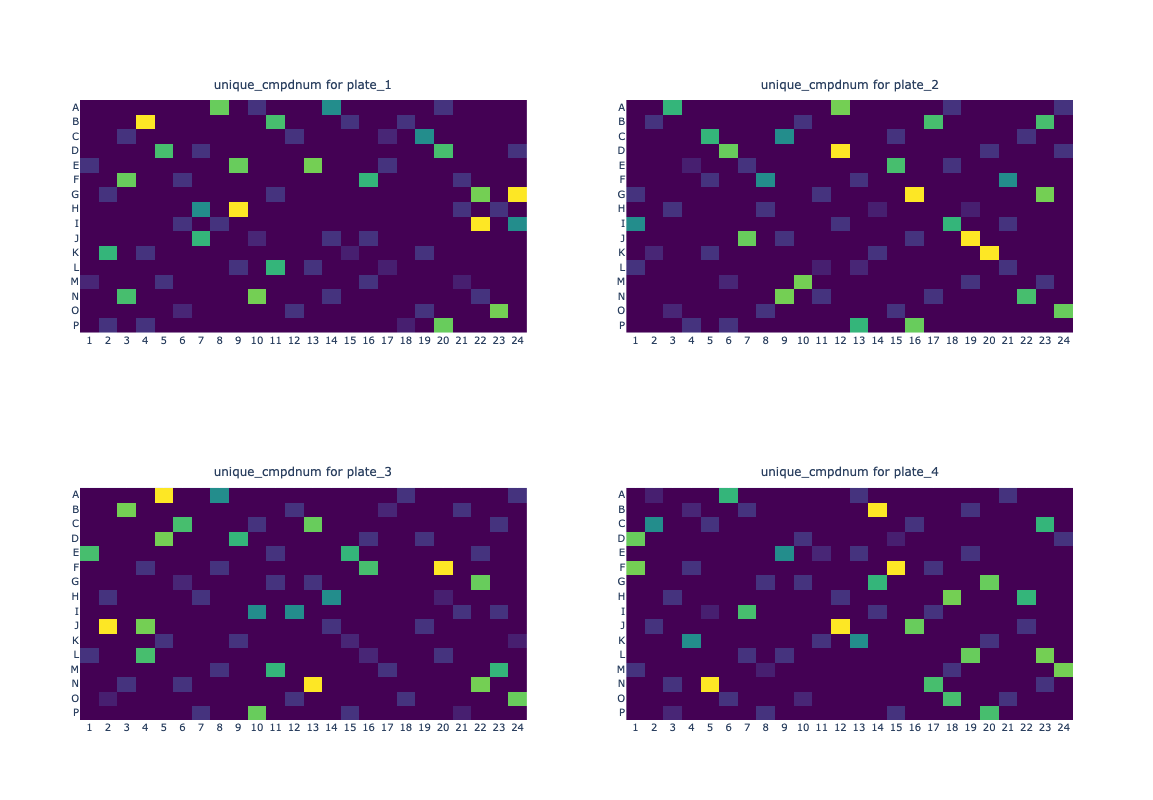

Figure exported as PDF: platemaps/OASIS_DILI_ECP_PLAID.pdf
Interactive plot saved as HTML: platemaps/OASIS_DILI_ECP_PLAID.html


In [130]:
csv_path = "/home/jovyan/jonne/plaid/OASIS_PLAID_LAYOUTS/OASIS_DILI_ECP/output/OASIS_DILI_ECP_PLAID.csv"
df_plaid = pl.read_csv(csv_path)

unique_cmpd_mapping = (df_plaid.select("cmpdname").unique().with_row_index(name="unique_cmpdnum"))
df_plaid = df_plaid.join(unique_cmpd_mapping, on="cmpdname")

plate_heatmap(
    df=df_plaid,  
    plate_names=["plate_1", "plate_2", "plate_3", "plate_4"],  
    highlight_compounds=["DMSO","ctrl1", "ctrl2","ctrl3","ctrl4","ctrl5","ctrl6","ctrl7","ctrl8"],
    subplot_num_columns=2,  
    plot_size=400,  
    measurement="unique_cmpdnum", 
    plate_well_columns={
        "plates": "plateID",  
        "wells": "well",    
    },
    output_folder="platemaps",  
    output_filename="OASIS_DILI_ECP_PLAID.pdf",
    export_as_pdf=True, 
    export_as_html=True
)

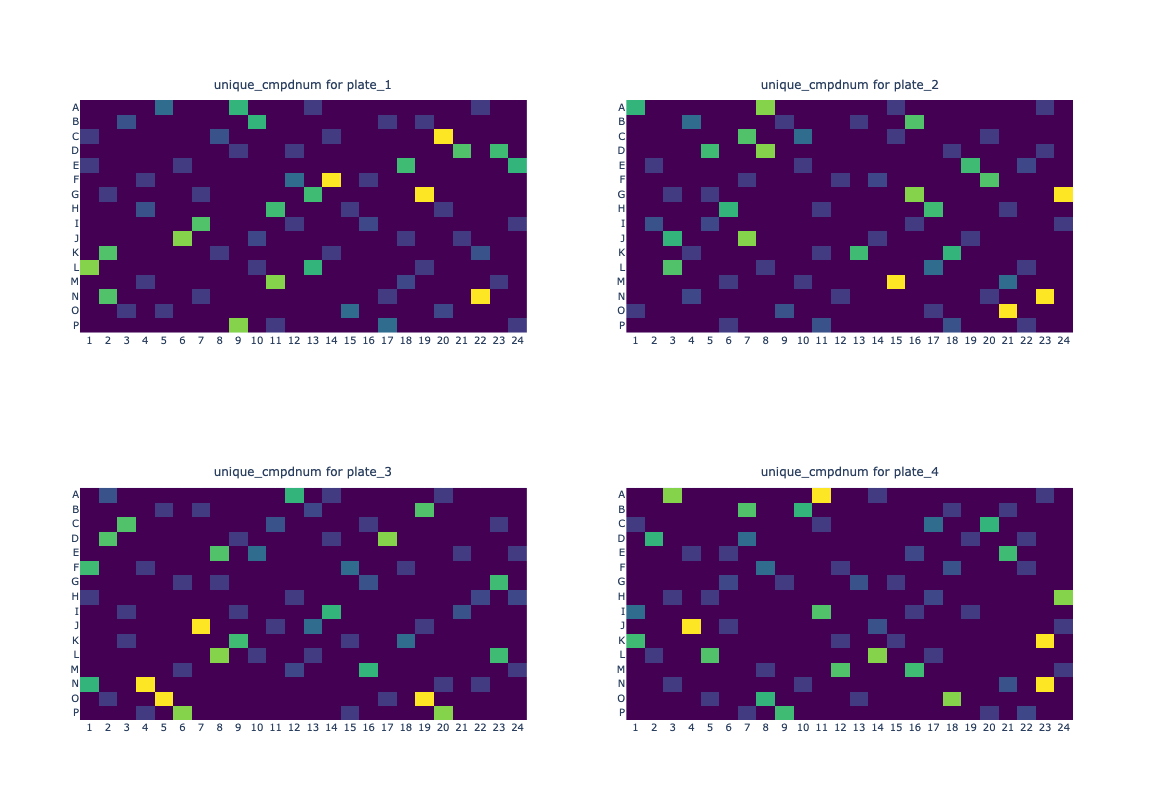

Figure exported as PDF: platemaps/OASIS_JUMP-Target2_ECP_PLAID.pdf
Interactive plot saved as HTML: platemaps/OASIS_JUMP-Target2_ECP_PLAID.html


In [131]:
csv_path = "/home/jovyan/jonne/plaid/OASIS_PLAID_LAYOUTS/OASIS_JUMP-Target2_ECP/output/OASIS_JUMP-Target2_ECP_PLAID.csv"
df_plaid = pl.read_csv(csv_path)

unique_cmpd_mapping = (df_plaid.select("cmpdname").unique().with_row_index(name="unique_cmpdnum"))
df_plaid = df_plaid.join(unique_cmpd_mapping, on="cmpdname")

plate_heatmap(
    df=df_plaid,  
    #plate_names=["plate_1", "plate_2", "plate_3", "plate_4"],  
    highlight_compounds=["DMSO", "ctrl1", "ctrl2", "ctrl3", "ctrl4", "ctrl5", "ctrl6", "ctrl7", "ctrl8"],
    subplot_num_columns=2,  
    plot_size=400,  
    measurement="unique_cmpdnum", 
    plate_well_columns={
        "plates": "plateID",  
        "wells": "well",    
    },
    output_folder="platemaps",
    output_filename="OASIS_JUMP-Target2_ECP_PLAID.pdf",
    export_as_pdf=True,
    export_as_html=True
)
